## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.metrics import classification_report

import wrangle
import explore
from model import model_df
pd.set_option('display.max_columns', None)

import json
import folium

## Acquiring the data

In [2]:
df = pd.read_csv('service_calls.csv')

## Preparing the data

In [3]:
df = wrangle.clean_311(df)

In [4]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
CASEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1018 KING AVE, San Antonio, 78211",4,2108015.0,13680344.0,804.0,933,129.0,Very Early Response,0,0,0,0,1,0,0,0,0,0,0,78211
1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"11800 FISCHER RD, San Antonio, 78073",4,2091672.0,13658660.0,805.0,131,-674.0,Extremely Late Response,0,0,0,0,1,0,0,0,0,0,0,78073


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356715 entries, 1014281655 to 1016870499
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356715 non-null  datetime64[ns]
 1   due_date                  356715 non-null  datetime64[ns]
 2   closed_date               356715 non-null  datetime64[ns]
 3   is_late                   356715 non-null  object        
 4   dept                      356715 non-null  object        
 5   call_reason               356715 non-null  object        
 6   case_type                 356715 non-null  object        
 7   case_status               356715 non-null  object        
 8   source_id                 356715 non-null  object        
 9   address                   356715 non-null  object        
 10  council_district          356715 non-null  int64         
 11  longitude                 356715 non-null  float64  

In [6]:
# This dataset is very thorough with nulls only around 10% for the dept column (nulls in CLOSEDDATETIME is just 
# indicative of an open case)

df.isna().sum()

open_date                   0
due_date                    0
closed_date                 0
is_late                     0
dept                        0
call_reason                 0
case_type                   0
case_status                 0
source_id                   0
address                     0
council_district            0
longitude                   0
latitude                    0
days_open                   0
resolution_days_due         0
days_before_or_after_due    0
level_of_delay              0
district_0                  0
district_1                  0
district_2                  0
district_3                  0
district_4                  0
district_5                  0
district_6                  0
district_7                  0
district_8                  0
district_9                  0
district_10                 0
zipcode                     0
dtype: int64

In [7]:
# Roughly 1/5 of our cases came back late

df.groupby('is_late').dept.count()

is_late
NO     306802
YES     49913
Name: dept, dtype: int64

In [8]:
# Note that the CLOSEDDATETIME column has 54053 nulls which matches, probably safe to assume these cases are indeed
# still open

df.groupby('case_status').dept.count()

case_status
Closed    356715
Name: dept, dtype: int64

In [9]:
df.groupby('council_district').dept.count()

council_district
0      1494
1     45889
2     46987
3     45709
4     34595
5     49986
6     30364
7     33447
8     19435
9     19437
10    29372
Name: dept, dtype: int64

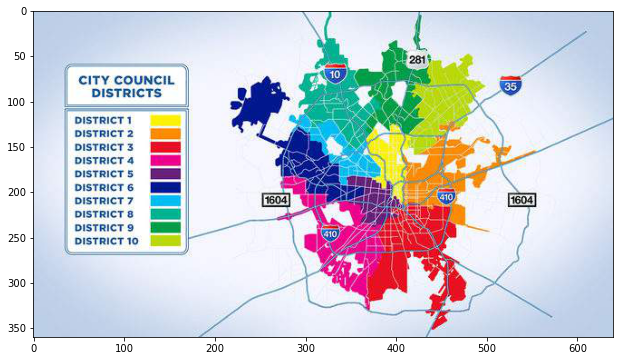

In [10]:
plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

<AxesSubplot:xlabel='dept', ylabel='count'>

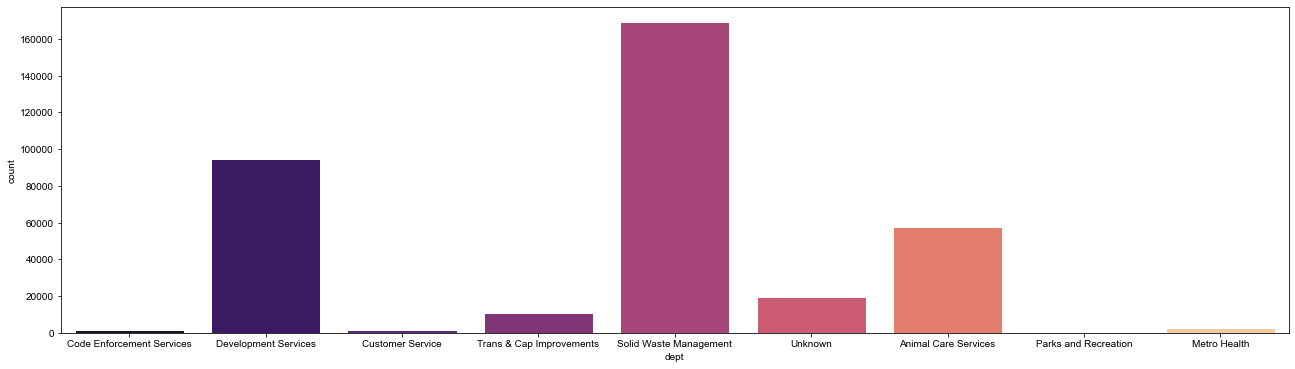

In [11]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'dept', palette = "magma")

<AxesSubplot:xlabel='call_reason', ylabel='count'>

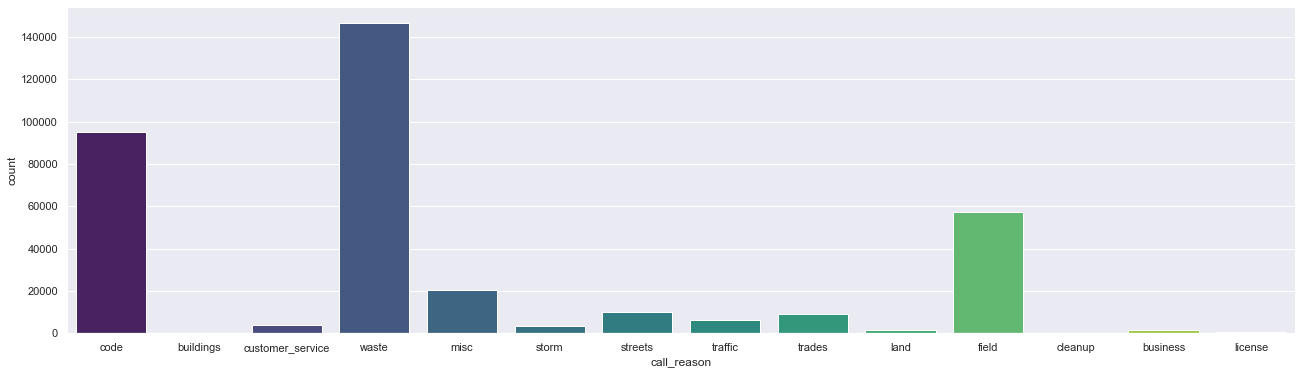

In [12]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'call_reason', palette = "viridis")

## Explore

- Do different areas get better general service? 
- Are different departments/issues expected to take longer?
- Do different areas get better service depending on the department/issue?

In [13]:
train, validate, test = wrangle.split(df)
district_df = explore.create_district_df(train)
zip_df = explore.create_zip_df(train)
dept_df = explore.create_dept_df(train)
call_reason_df = explore.create_call_reason_df(train)

### Exploring by council district

<AxesSubplot:xlabel='council_district', ylabel='count'>

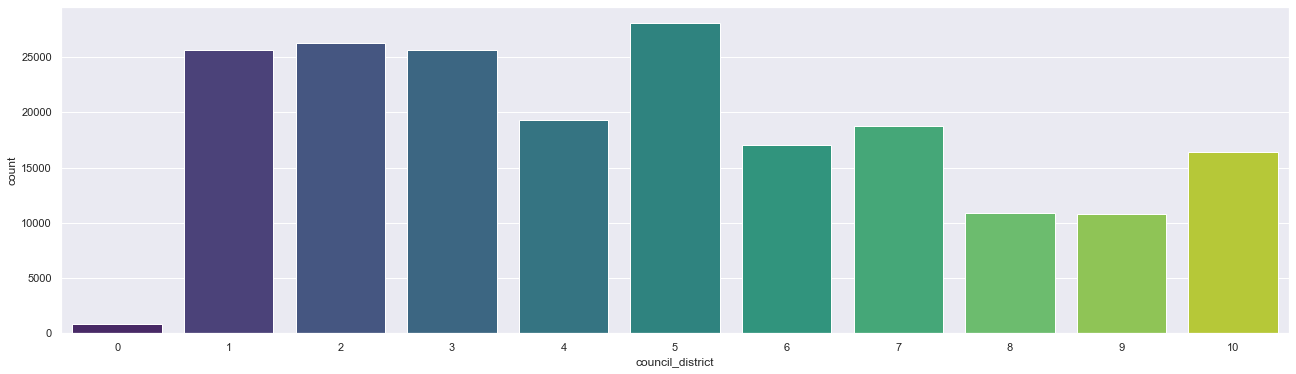

In [14]:
# Showing the counts of calls by district, 1, 2, 3, and 5 seem to have the highest 
# call volumes (central, south, and east sides)

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train, x = 'council_district', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

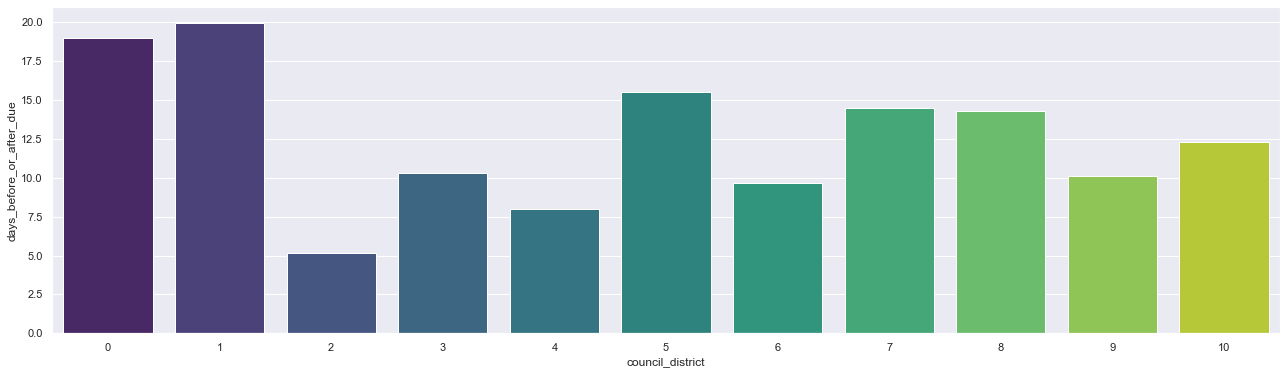

In [15]:
# Showing the days_before_or_after_due average by district, district 2 is the latest.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due_med'>

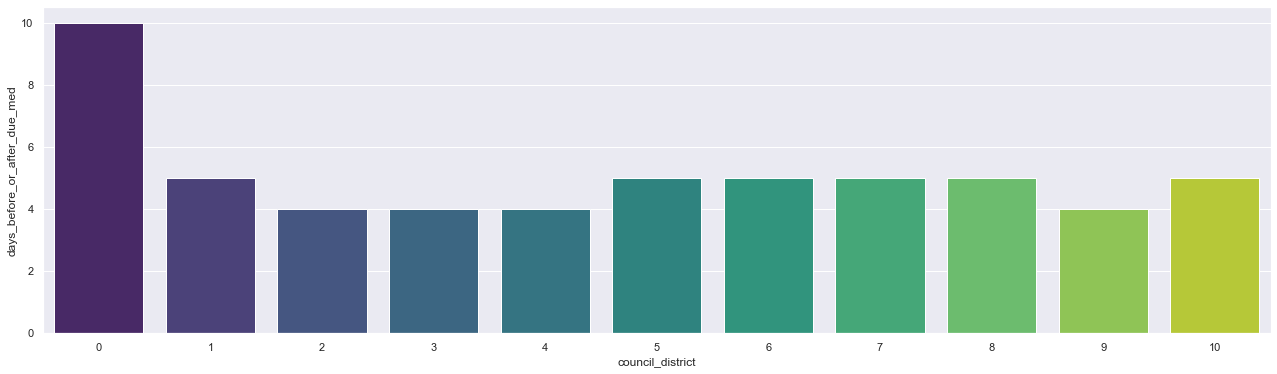

In [16]:
# Showing the days_before_or_after_due median by district, it would seem our data is heavily skewed to the right,
# since my median is giving me much lower numbers than my average, let's confirm this.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due_med', palette = "viridis")

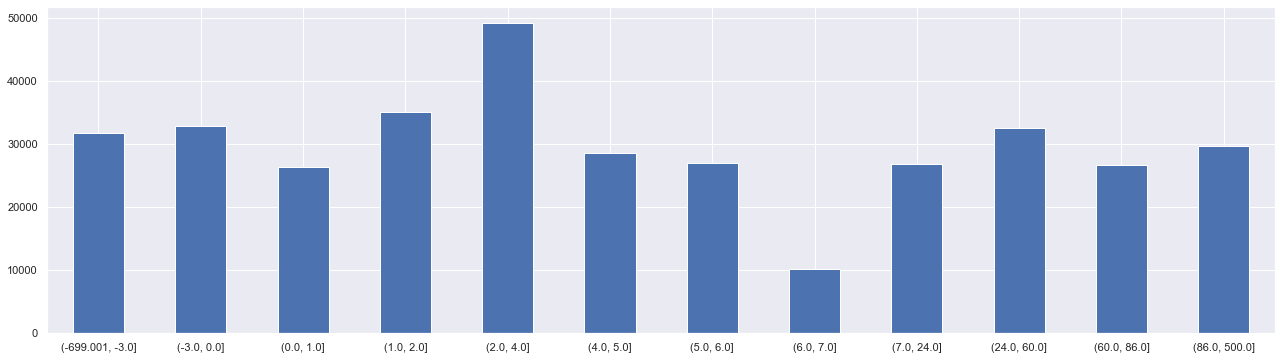

In [17]:
# Probably not the best plot but it is indeed skewed right

out = pd.qcut(df['days_before_or_after_due'], q=12)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(22,6))
plt.show()

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

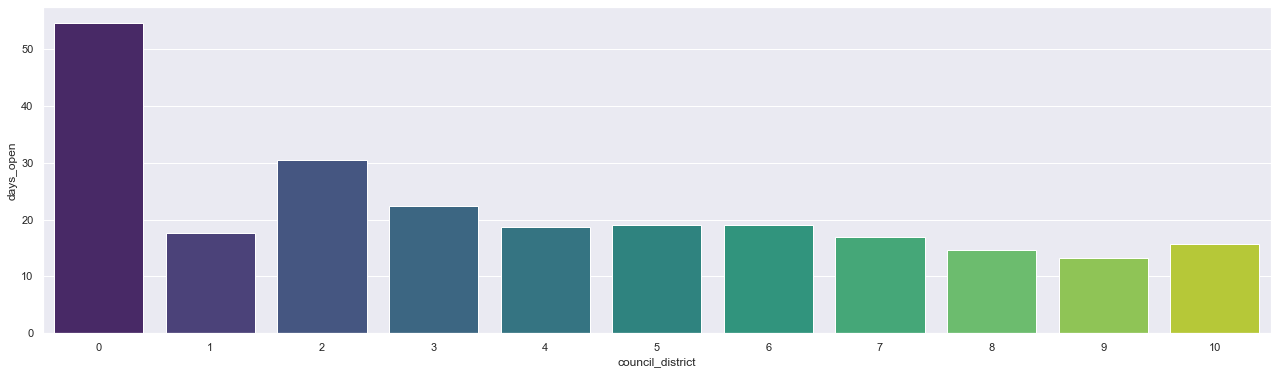

In [18]:
# Showing average days_open by district, pretty consistent with the exception of district 2 and 0

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_open', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='days_open_med'>

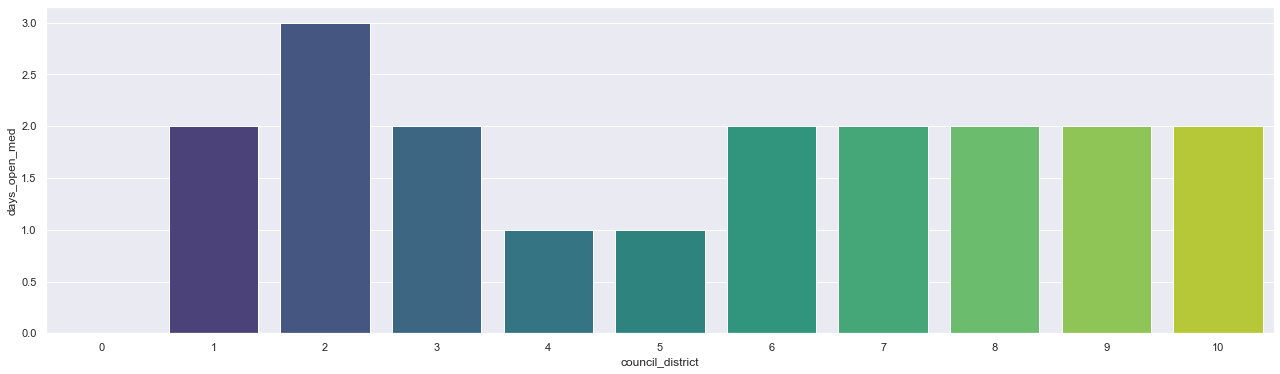

In [19]:
# Showing median days open by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_open_med', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='resolution_days_due'>

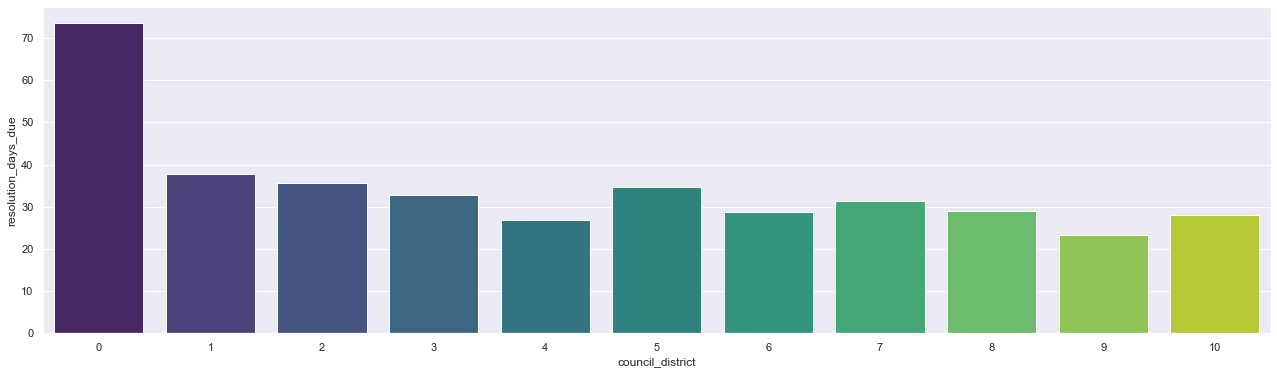

In [20]:
# Plotting average amount of time tasks are given to be completed by district, district 0 gets a lot of time 
# for some reason

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'resolution_days_due', palette = "viridis")

#### Takeaways:
- Central, south, and east sides have the highest call volumes
- Data is skewed to the right
- District 0 is allotted a good amount of time to get their tasks done, not sure why that is
- District 2 and 0 seem to have the worst response times

### Exploring by dept

<AxesSubplot:xlabel='dept', ylabel='count'>

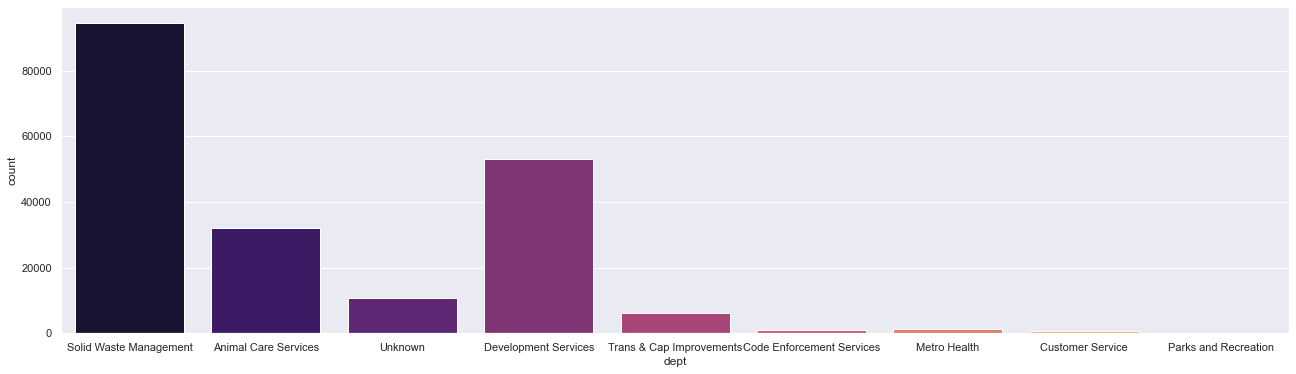

In [21]:
# Showing the counts of calls by dept, solid waste management is the most called on by far

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train, x = 'dept', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='days_before_or_after_due'>

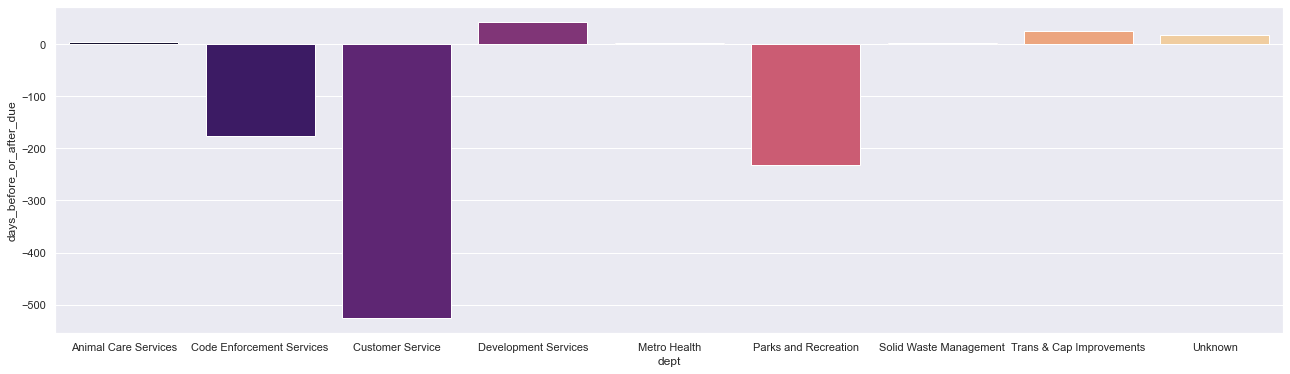

In [22]:
# Showing the days_before_or_after_due average by dept, with the consistency of dictrict response times,
# it would seem department and call_reason are large indicators of how early/late a task will be done

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_before_or_after_due', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='days_open'>

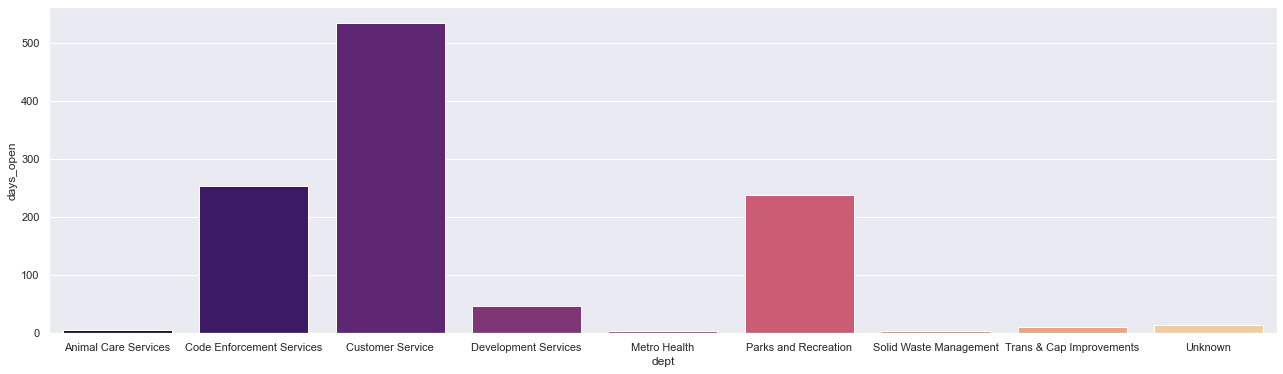

In [23]:
# Showing the days_open average by dept, it would seem the more days a department is assigned to get a task done
# the more likely they are to be late. Maybe because long term projects are more difficult to predict?

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_open', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='resolution_days_due'>

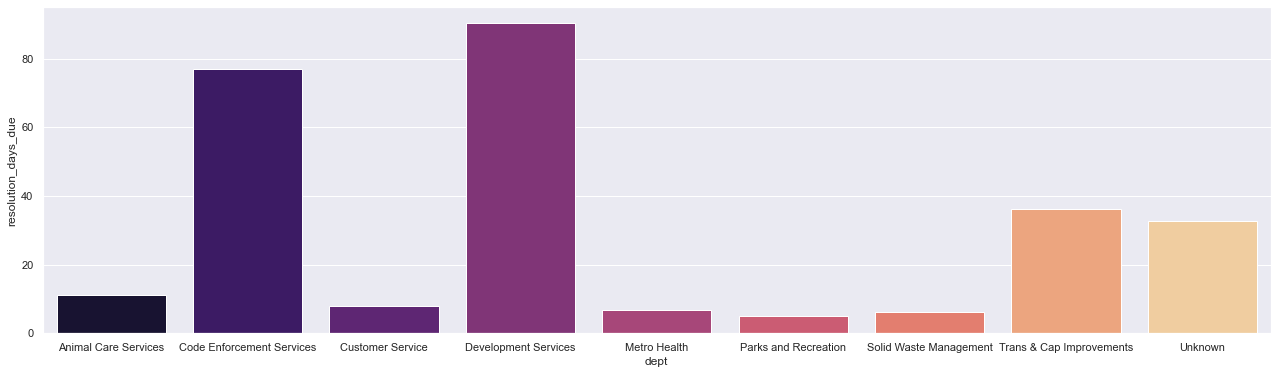

In [24]:
# Showing the days_open average by dept

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'resolution_days_due', palette = "magma")

#### Takeaways:
- Customer Service really needs to get their stuff together, their response time is atrocious
- It would seem the more calls a department receives, the better they are at responding to them in a timely manner.  Customer service, code enforcement, and customer service make up the smallest three departments by call volume, but the lowest rated on response time. Conversely all the other categories all manage to have average response times that indicate they were early

### Explore by call reason

<AxesSubplot:xlabel='call_reason', ylabel='count'>

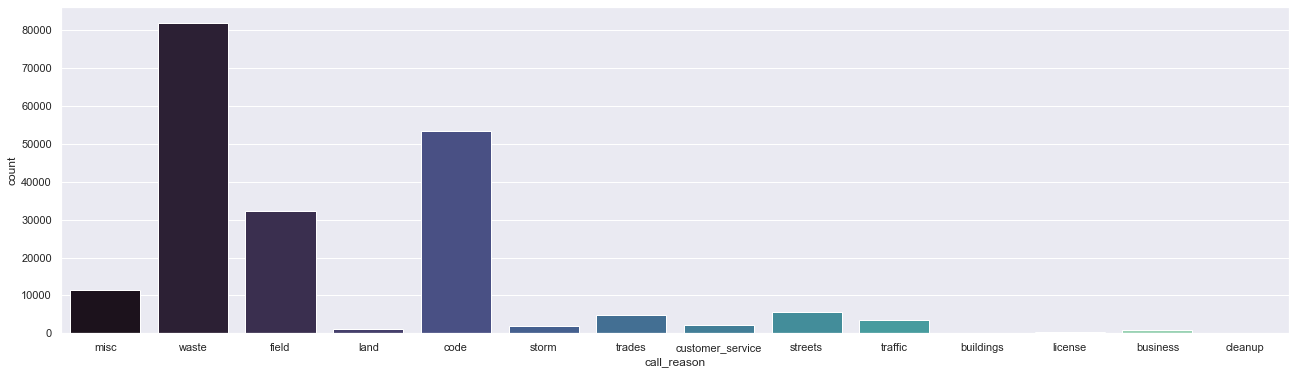

In [25]:
# Showing the counts of calls by call_reason, waste is the most called on, followed by code violations and field

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train, x = 'call_reason', palette = "mako")

<AxesSubplot:xlabel='call_reason', ylabel='days_before_or_after_due'>

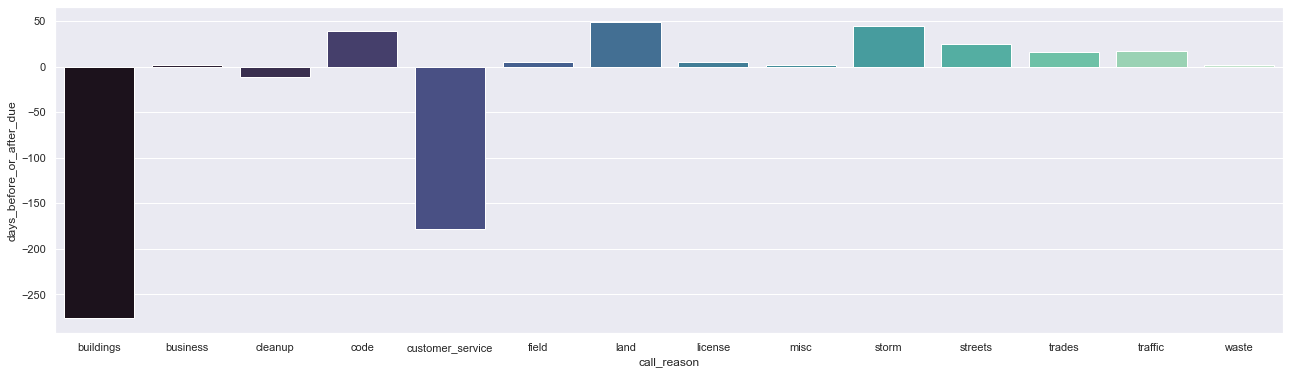

In [26]:
# Showing the days_before_or_after_due average by dept, buildings obviously taking the longest and cleanup 
# is also regularly late

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = call_reason_df, x = 'call_reason', y = 'days_before_or_after_due', palette = "mako")

<AxesSubplot:xlabel='call_reason', ylabel='days_open'>

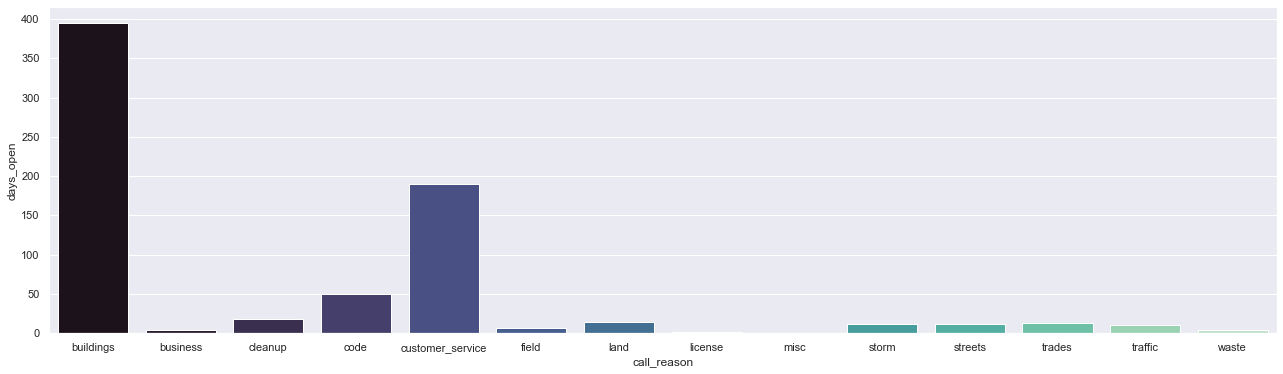

In [27]:
# Showing the days_open average by dept, buildings are alotted the most time but also end up the most late, same 
# goes for customer service. I would assume it's harder to pinpoint when a task will be done if the assignment has
# a longer due date (more room for complications)

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = call_reason_df, x = 'call_reason', y = 'days_open', palette = "mako")

### Subsetting by department and then examining by district

In [28]:
waste_df = train[train['dept'] == 'Solid Waste Management']
trans_df = train[train['dept'] == 'Trans & Cap Improvements']
cust_df = train[train['dept'] == 'Customer Service']
unk_df = train[train['dept'] == 'Unknown']
metro_df = train[train['dept'] == 'Metro Health']
dev_df = train[train['dept'] == 'Development Services']
animal_df = train[train['dept'] == 'Animal Care Services']
code_df = train[train['dept'] == 'Code Enforcement Services']
parks_df = train[train['dept'] == 'Parks and Recreation']
district_waste_df = explore.create_district_df(waste_df)
district_trans_df = explore.create_district_df(trans_df)
district_cust_df = explore.create_district_df(cust_df)
district_unk_df = explore.create_district_df(unk_df)
district_metro_df = explore.create_district_df(metro_df)
district_dev_df = explore.create_district_df(dev_df)
district_animal_df = explore.create_district_df(animal_df)
district_code_df = explore.create_district_df(code_df)
district_parks_df = explore.create_district_df(parks_df)

### Waste Management

<AxesSubplot:xlabel='council_district', ylabel='count'>

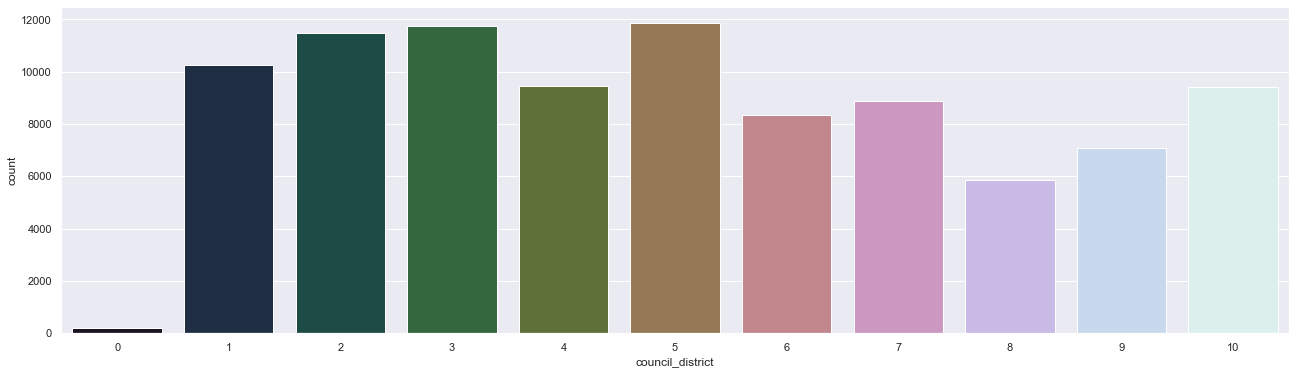

In [29]:
# Counts of reports for waste management by council district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = waste_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

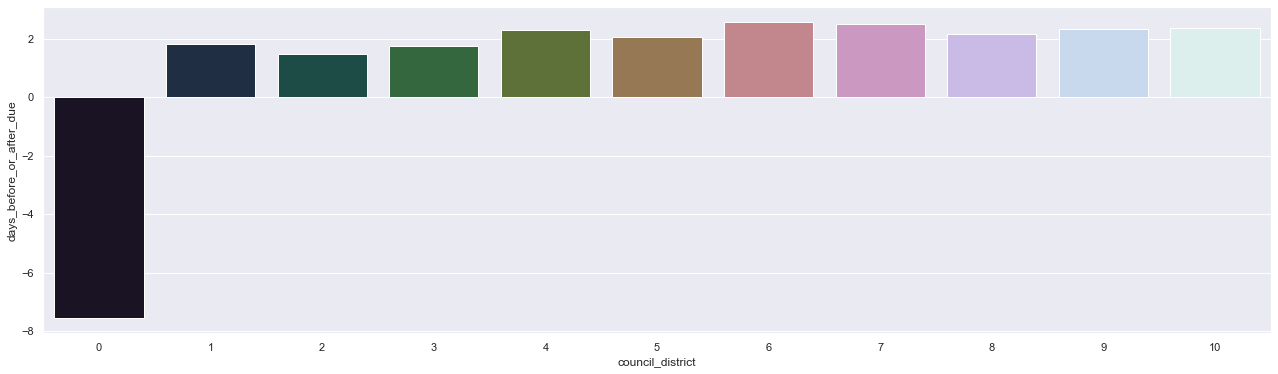

In [30]:
# Average response time by district for waste management department. Waste management is real bad at getting
# to district 0.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_waste_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Transportation

<AxesSubplot:xlabel='council_district', ylabel='count'>

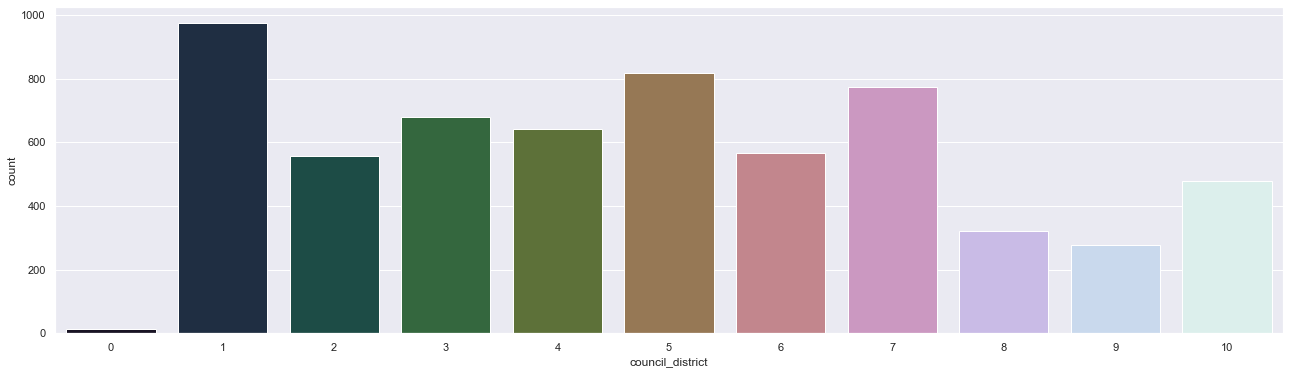

In [31]:
# Counts of reports for transportation by council district, there's a lot of calls for transportation in district 1
# a downtown area
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = trans_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

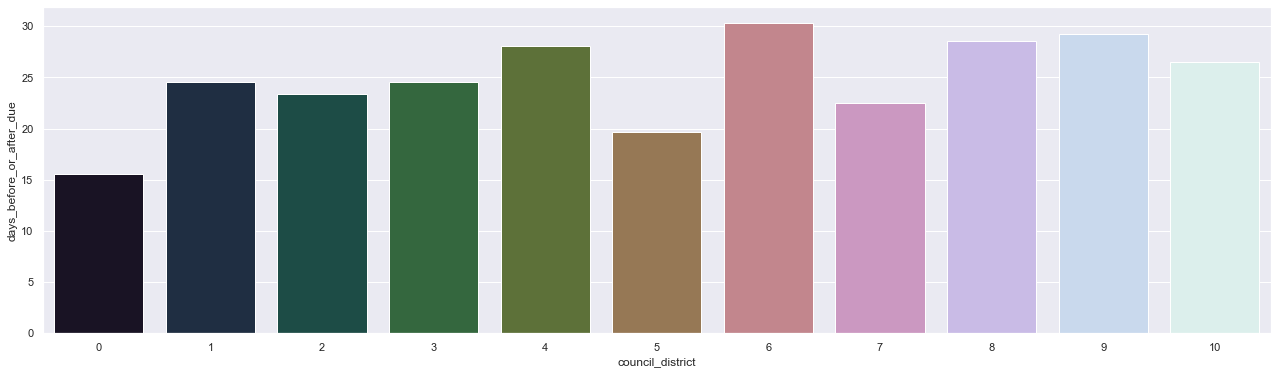

In [32]:
# Average response time by district for transportation department. Transportation is quick at getting
# to district 0.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_trans_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Customer Service

<AxesSubplot:xlabel='council_district', ylabel='count'>

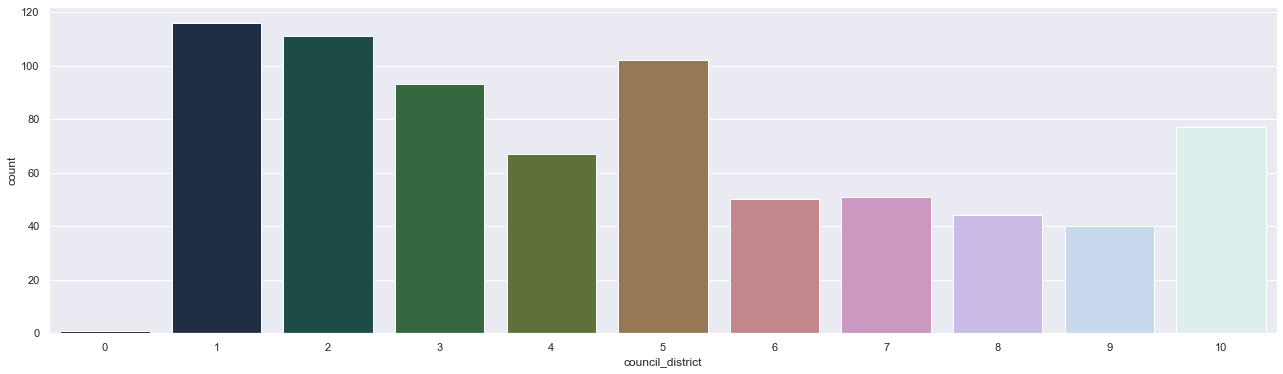

In [33]:
# Counts of reports for customer service by council district, there's a small number of calls for district 8 and 9

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = cust_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

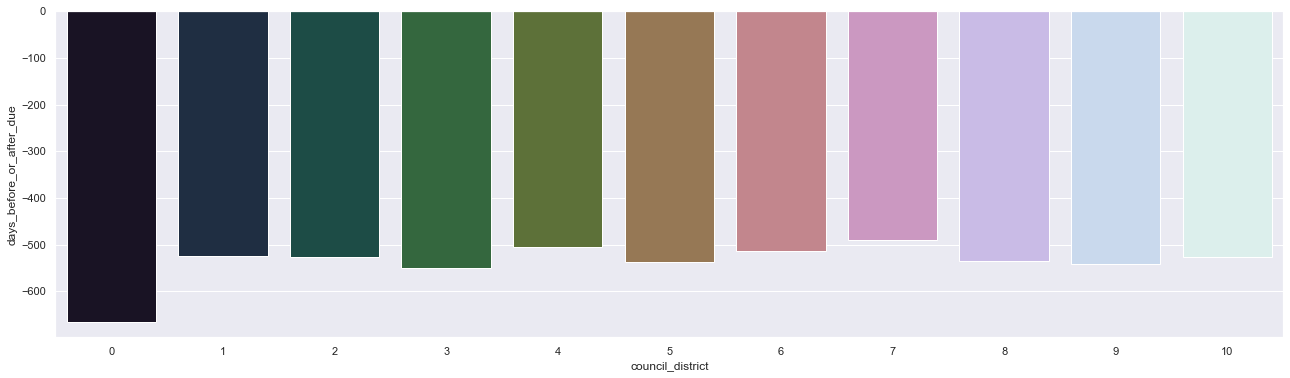

In [34]:
# Average response time by district for customer service department. Customer service late across 
# the board

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_cust_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Metro Health

<AxesSubplot:xlabel='council_district', ylabel='count'>

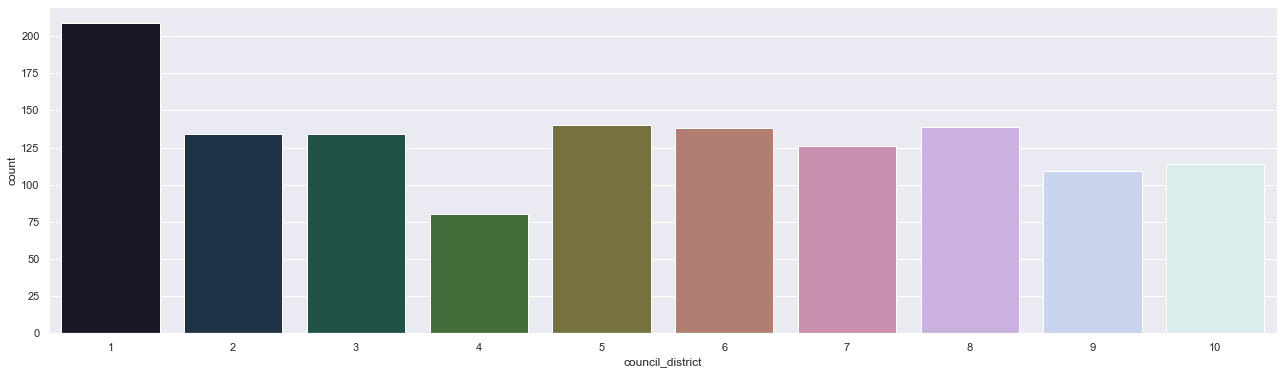

In [35]:
# Counts of reports for metro health by council district (dropped district 0 since there was  only 1 call 
# from there), there's a large number of calls for metro health in  district 1. Does higher population 
# density result in more calls for health? What kind of things does metro health handle?

metro_df = metro_df[metro_df['council_district'] != 0]
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = metro_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

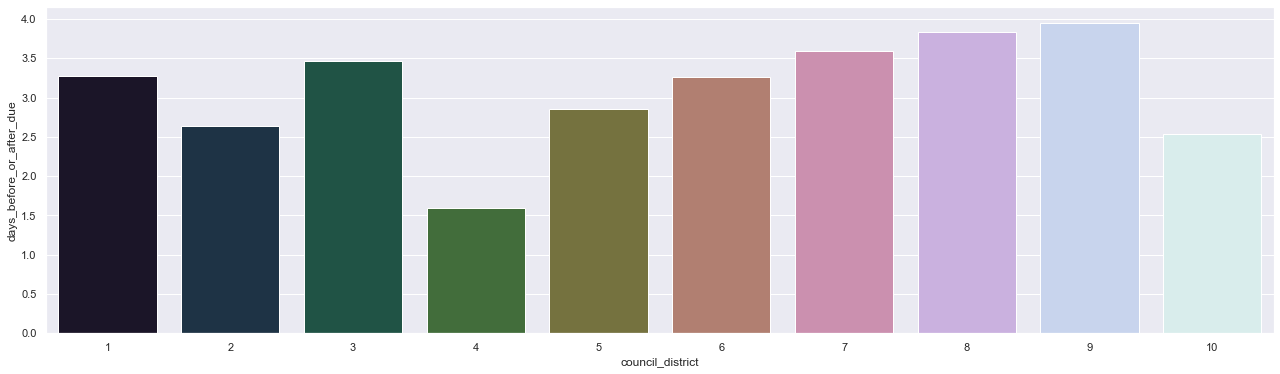

In [36]:
# Average response time by district for metro health department.  Metro health is performing really well in every
# district! Maybe there's no time for delay when it comes to health issues? That would make sense as we saw 
# earlier that the health department had one of the lowest days_open.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
metro_health = district_metro_df[district_metro_df['council_district'] != 0]
sns.barplot(data = metro_health , x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Development Services

<AxesSubplot:xlabel='council_district', ylabel='count'>

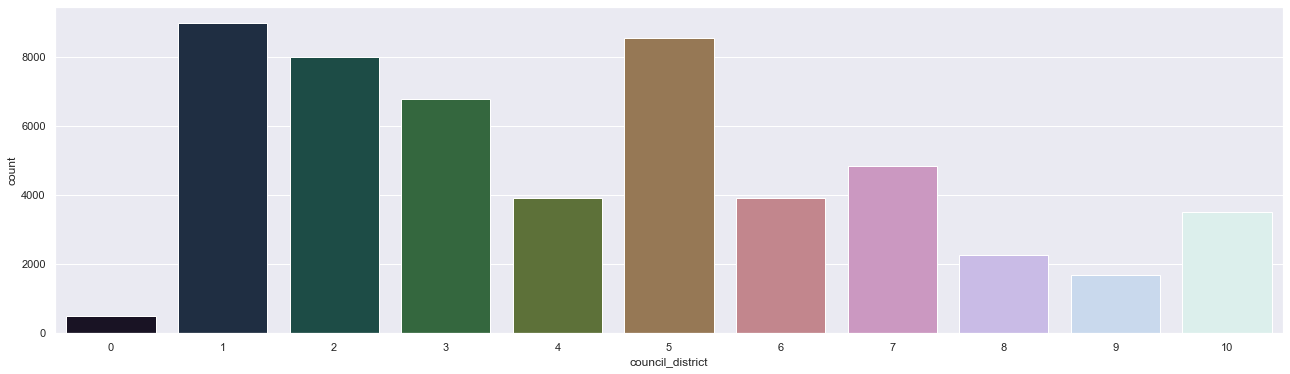

In [37]:
# Counts of reports for development services by council district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = dev_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

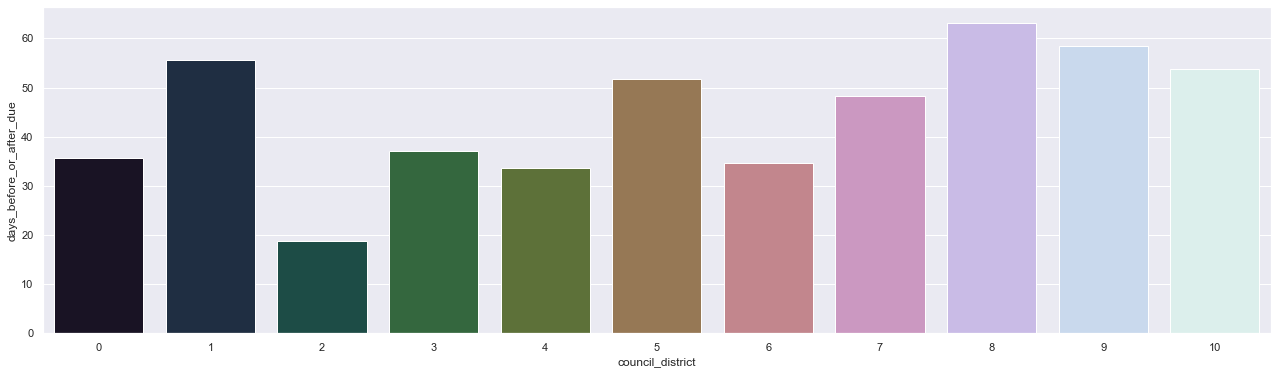

In [38]:
# Average response time by district for development services department. After looking at a good amount of these
# district 2 is regularly later on response times. Stays consistent into development services

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_dev_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Animal Care Services

<AxesSubplot:xlabel='council_district', ylabel='count'>

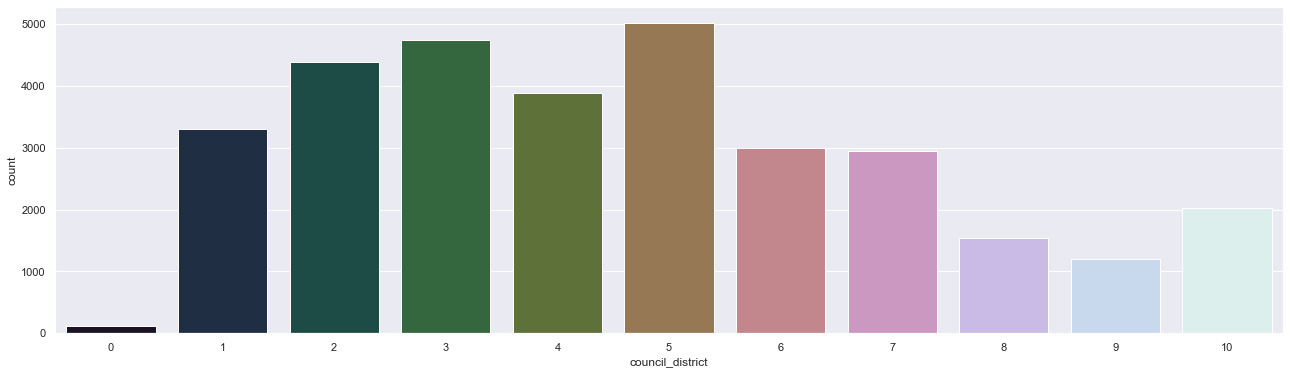

In [39]:
# Counts of reports for animal cares services by council district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = animal_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

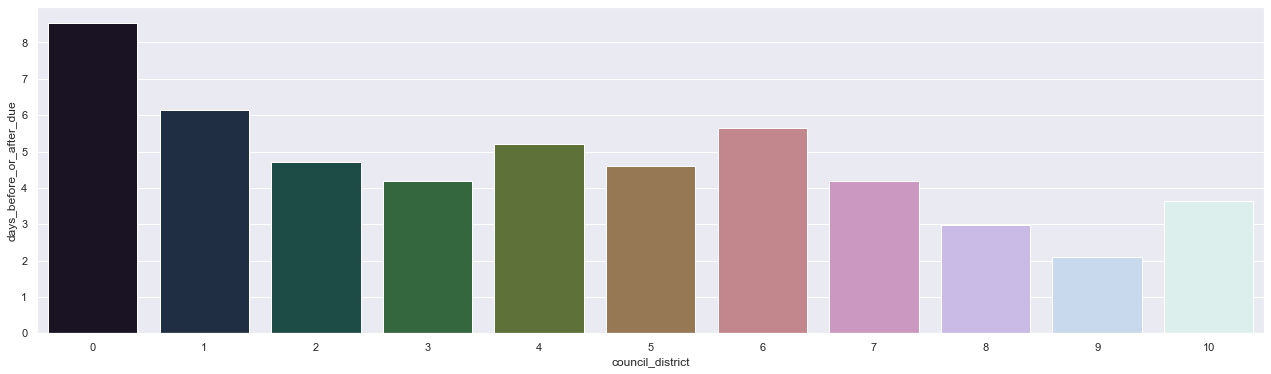

In [40]:
# Average response time by district for animal care services department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_animal_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Code Enforcement

<AxesSubplot:xlabel='council_district', ylabel='count'>

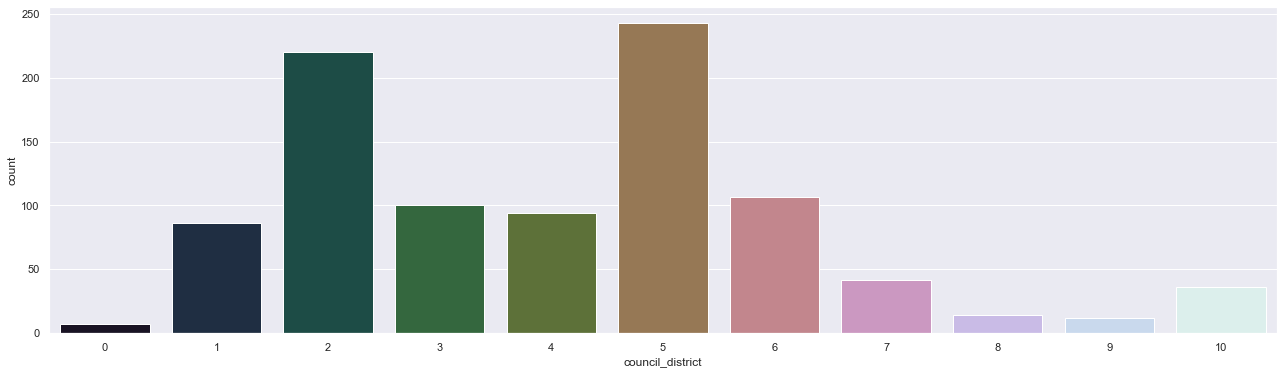

In [41]:
# Counts of reports for code enforcement services by council district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = code_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

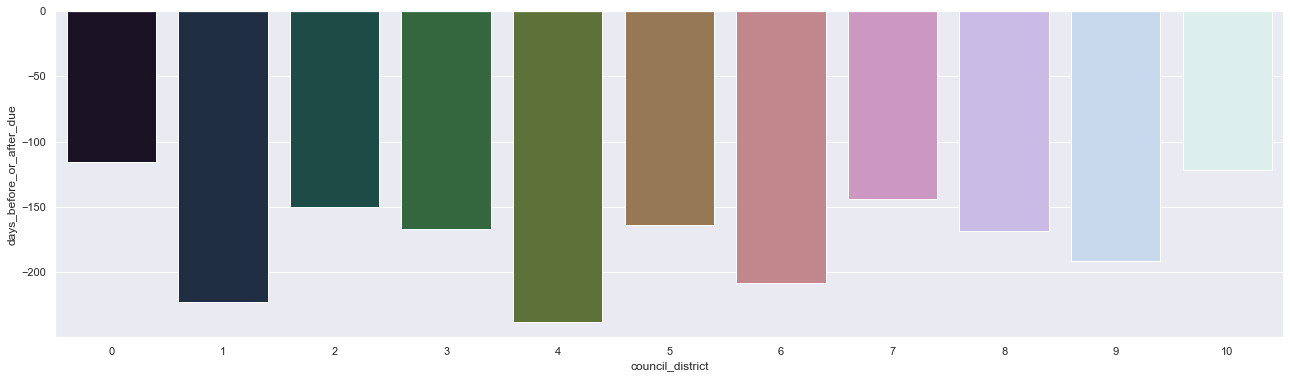

In [42]:
# Average response time by district for code enforcement services department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_code_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Parks and Recreation

<AxesSubplot:xlabel='council_district', ylabel='count'>

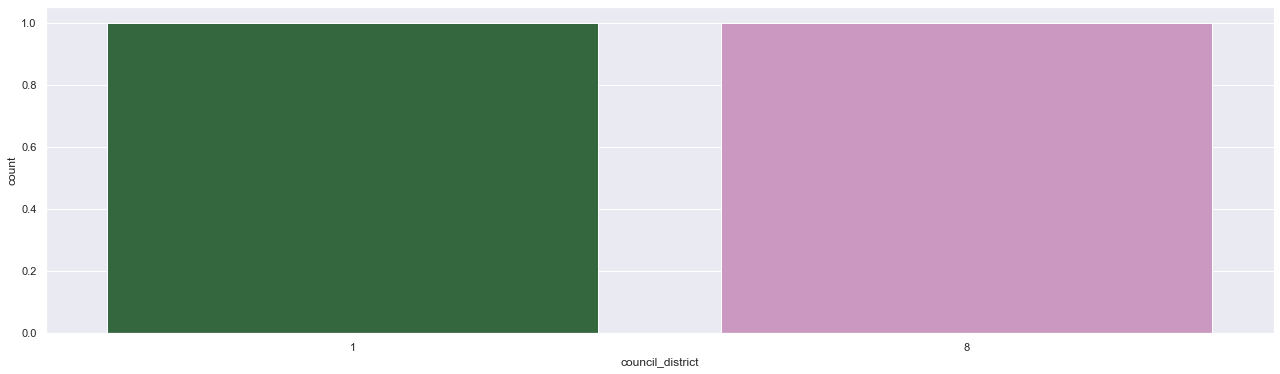

In [43]:
# Counts of reports for parks and recreation by council district, it seems parks and rec only has 2 entries

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = parks_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

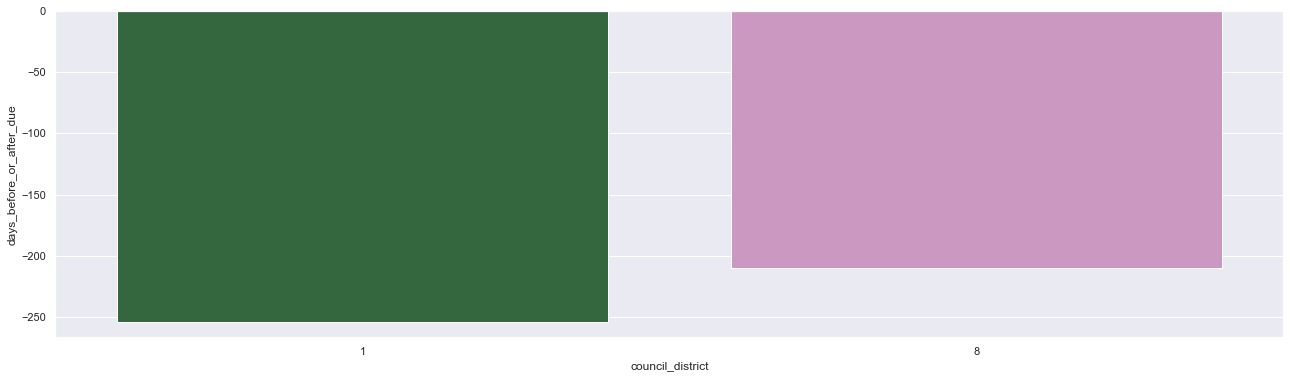

In [44]:
# Average response time by district for parks and rec services department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_parks_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Unknown

<AxesSubplot:xlabel='council_district', ylabel='count'>

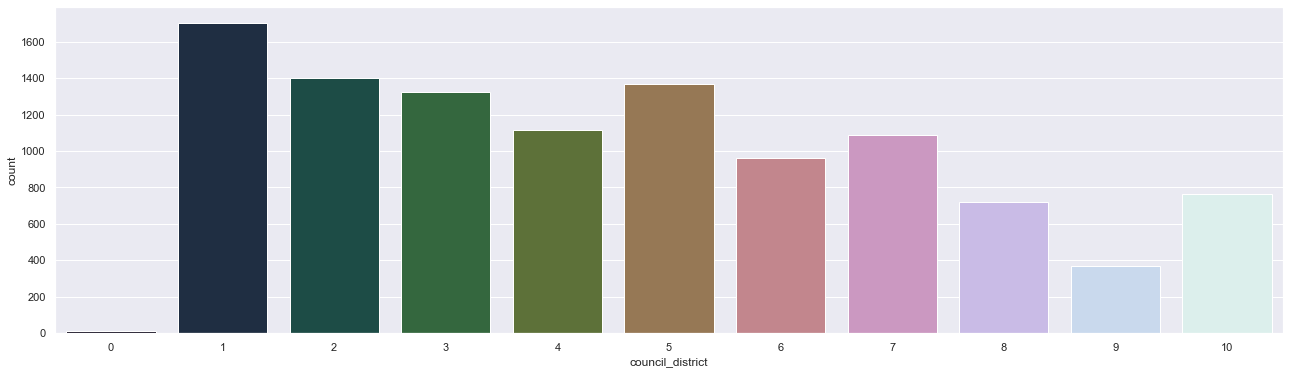

In [45]:
# Counts of reports for unknown department by council district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = unk_df, x = 'council_district', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

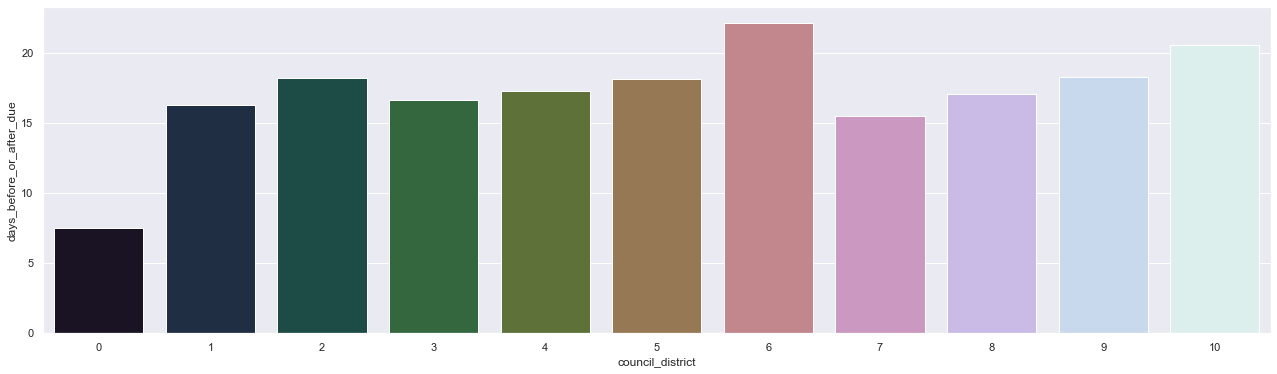

In [46]:
# Average response time by district for unknown department.

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_unk_df, x = 'council_district', y = 'days_before_or_after_due', palette = "cubehelix")

### Other factors, poverty and population density

<AxesSubplot:xlabel='council_district', ylabel='population_density'>

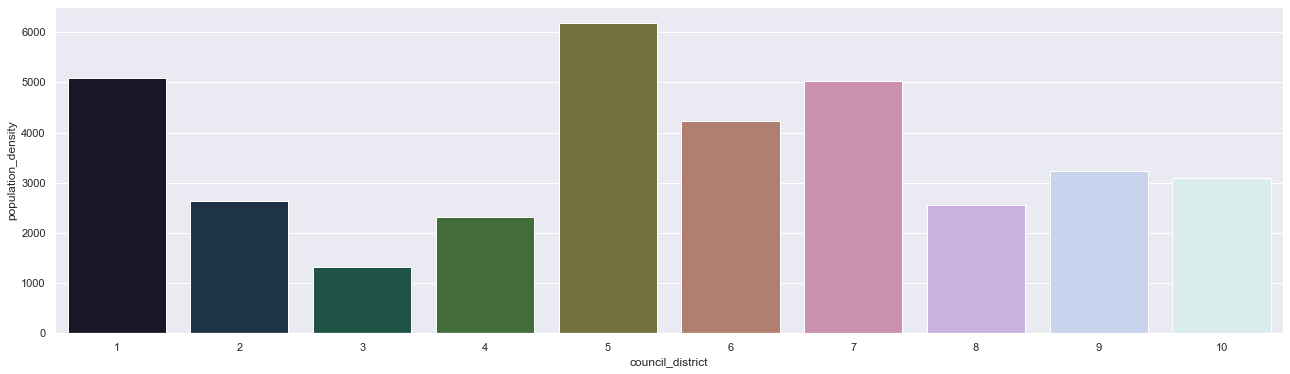

In [47]:
# Let's check population densities using information from sa2020.org (https://sa2020.org/city-council-profiles)

pop_dens = {'1': 5078, '2': 2631, '3': 1318, '4': 2321, '5': 6188, '6': 4235, '7': 5017,
                         '8': 2556, '9': 3224, '10': 3087}
pop_dens = pd.DataFrame(list(pop_dens.items()),columns = ['council_district','population_density'])
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = pop_dens, x = 'council_district', y = 'population_density', palette = "cubehelix")

<AxesSubplot:xlabel='council_district', ylabel='per_capita_income'>

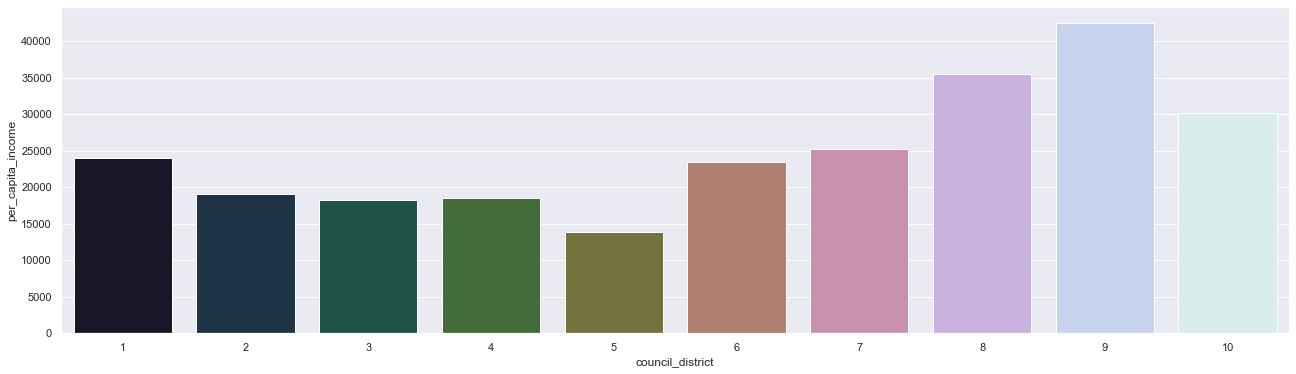

In [48]:
# Average per capita income by district

per_cap_in = {1: 23967, 2: 19055, 3: 18281, 4: 18500, 5: 13836, 6: 23437, 7: 25263,
                         8: 35475, 9: 42559, 10: 30240}
per_cap_in = pd.DataFrame(list(per_cap_in.items()),columns = ['council_district','per_capita_income'])
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = per_cap_in, x = 'council_district', y = 'per_capita_income', palette = "cubehelix")

## Hypothesis Testing

#### Is there a difference in response time between district 2 and the average response time?

Null Hypothesis: There is no difference between district 2 and the average response time.

Alternative Hypothesis: There is a difference between district 2 and the average response time.

Alpha = .05

In [49]:
district_2 = train[train['council_district'] == 2]

t, p = stats.ttest_1samp(district_2.days_before_or_after_due, train.days_before_or_after_due.mean())
t, p

(-13.726046723241442, 9.952994391328653e-43)

With a p-value falling far below my set alpha, I can safely conclude that there is likely a difference in response time between district 2 and the overall average.

####  How about for all districts that fall below 20,000 per capita income and those that are above?

Null Hypothesis: There is no difference between districts that fall below 20,000 per capita income and districts that fall above 20,000 per capita income response time.

Null Hypothesis: There is a difference between districts that fall below 20,000 per capita income and districts that fall above 20,000 per capita income response time.

Alpha = .05

In [50]:
# Checking for variability

districts_lower = train[(train['council_district'] == 2) | (train['council_district'] == 3) | (train['council_district'] == 4) | (train['council_district'] == 5)]
districts_upper = train[(train['council_district'] == 1) | (train['council_district'] == 6) | (train['council_district'] == 7) | (train['council_district'] == 8) | (train['council_district'] == 9) | (train['council_district'] == 10)]

districts_lower.days_before_or_after_due.std(), districts_upper.days_before_or_after_due.std()

(75.40060327950731, 67.34358632737236)

In [51]:
stats.ttest_ind(districts_lower.days_before_or_after_due, districts_upper.days_before_or_after_due)

Ttest_indResult(statistic=-13.268828794679198, pvalue=3.651216486525882e-40)

In [52]:
# Let's visualize these two
districts_lower.days_before_or_after_due.mean()
districts_upper.days_before_or_after_due.mean()

14.221180485846215

#### Is there a correlation between days until due date and response time?

In [53]:
corr, p = stats.pearsonr(train.resolution_days_due, train.days_before_or_after_due)
corr, p

(0.3961556454255236, 0.0)

<AxesSubplot:xlabel='resolution_days_due', ylabel='days_before_or_after_due'>

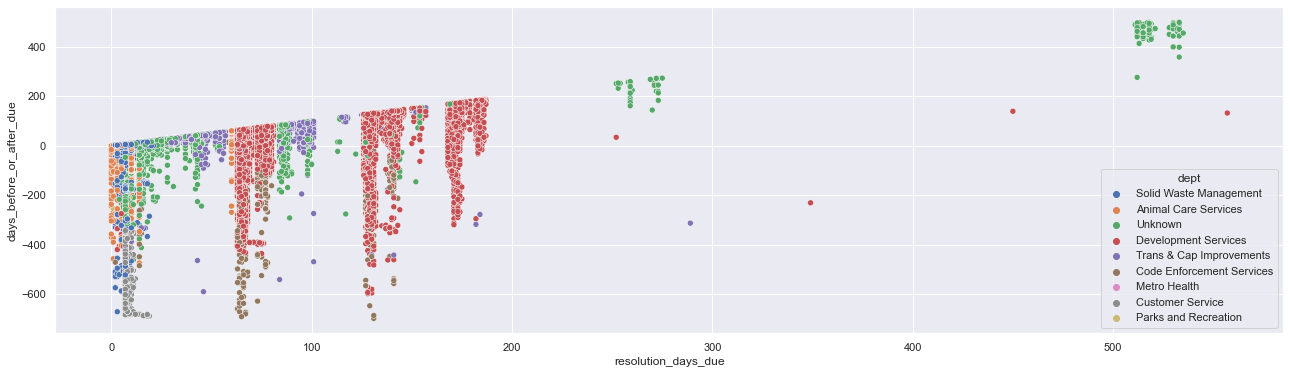

In [54]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data = train, x = 'resolution_days_due', y = 'days_before_or_after_due', hue = 'dept')

## Modeling

### Establishing a baseline

In [55]:
base_top = train[train['level_of_delay'] == 'Early Response']
len(base_top)/len(train)

0.741880256307569

### Prep for modeling

In [56]:
df = model_df()
df = df.drop(columns = ['council_district', 'source_id', 'dept', 'call_reason'])
train, validate, test = wrangle.split(df, stratify_by = 'level_of_delay')
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.separate_y(train, validate, test)

In [57]:
def scale_data(X_train, X_validate, X_test):
    '''
    This function will scale numeric data using Min Max transform after 
    it has already been split into train, validate, and test.
    '''
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    
   
    # we only .fit on the training data
    scaler.fit(X_train)
    train_scaled = scaler.transform(X_train)
    validate_scaled = scaler.transform(X_validate)
    test_scaled = scaler.transform(X_test)
    
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=X_train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=X_train.columns)
    
    
    return train_scaled, validate_scaled, test_scaled

In [58]:
X_train, X_validate, X_test = scale_data(X_train, X_validate, X_test)

In [59]:
X_train

,resolution_days_due,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
0,0.003591,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.016158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.005386,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.010772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.001795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199755,0.005386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199756,0.114901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
199757,0.005386,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199758,0.114901,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Random Forest Classifier

#### Max depth of 5 min_samples of 2

In [60]:
# A function to find how heavily each feature is weighed in the model created

def get_the_weights(rf, x_train):
    feat = rf.feature_importances_
    key = x_train.columns.tolist()
    val = feat.tolist()
    val = [round(num, 2) for num in val]
    res = {key[i]: val[i] for i in range(len(key))} 
    return res

In [61]:
# Creating the random forest model

rf5 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, random_state=123)

# Fitting the random forest model

rf5 = rf5.fit(X_train, y_train)

# Predicting on train

y5_pred = rf5.predict(X_train)

# Results

print(classification_report(y_train, y5_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91    148198
Extremely Early Response       0.00      0.00      0.00        83
 Extremely Late Response       0.68      0.51      0.59       555
           Late Response       0.46      0.01      0.01      5005
        On Time Response       0.99      0.20      0.34     28857
     Very Early Response       0.78      0.98      0.87     15299
      Very Late Response       0.00      0.00      0.00      1763

                accuracy                           0.84    199760
               macro avg       0.54      0.39      0.39    199760
            weighted avg       0.84      0.84      0.79    199760



In [62]:
# Predicting on validate

y5_val_pred = rf5.predict(X_validate)

# Results

print(classification_report(y_validate, y5_val_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91     63514
Extremely Early Response       0.00      0.00      0.00        35
 Extremely Late Response       0.62      0.46      0.53       238
           Late Response       0.46      0.01      0.02      2145
        On Time Response       0.99      0.21      0.34     12368
     Very Early Response       0.80      0.98      0.88      6557
      Very Late Response       0.00      0.00      0.00       755

                accuracy                           0.84     85612
               macro avg       0.53      0.38      0.38     85612
            weighted avg       0.84      0.84      0.79     85612



In [63]:
# Seeing how each variable is weighed
# Seems as though department and resolution days due are the two biggest factors

get_the_weights(rf5, X_train)

{'resolution_days_due': 0.57,
 'district_0': 0.0,
 'district_1': 0.0,
 'district_2': 0.0,
 'district_3': 0.0,
 'district_4': 0.0,
 'district_5': 0.0,
 'district_6': 0.0,
 'district_7': 0.0,
 'district_8': 0.0,
 'district_9': 0.0,
 'district_10': 0.0,
 'animal_care_services': 0.04,
 'code_enforcement_services': 0.01,
 'customer_services': 0.02,
 'development_services': 0.09,
 'metro_health': 0.0,
 'parks_and_rec': 0.0,
 'solid_waste_management': 0.05,
 'trans_and_cap_improvements': 0.0,
 'unknown_dept': 0.0,
 'buildings': 0.0,
 'business': 0.0,
 'cleanup': 0.0,
 'code': 0.07,
 'customer_service': 0.01,
 'field': 0.06,
 'land': 0.0,
 'license': 0.0,
 'misc': 0.01,
 'storm': 0.0,
 'streets': 0.0,
 'trades': 0.0,
 'traffic': 0.0,
 'waste': 0.02,
 'web_portal': 0.02,
 '311_mobile_app': 0.01,
 'constituent_call': 0.0,
 'internal_services_requests': 0.01}

#### Max depth of 10 min_samples of 3

In [64]:
# Creating the random forest model

rf10 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, random_state=123)

# Fitting the random forest model

rf10 = rf10.fit(X_train, y_train)

# Predicting on train

y10_pred = rf10.predict(X_train)

# Results

print(classification_report(y_train, y10_pred))

                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91    148198
Extremely Early Response       0.99      1.00      0.99        83
 Extremely Late Response       0.64      0.81      0.72       555
           Late Response       0.56      0.04      0.07      5005
        On Time Response       0.99      0.21      0.34     28857
     Very Early Response       0.79      0.99      0.88     15299
      Very Late Response       0.74      0.06      0.12      1763

                accuracy                           0.84    199760
               macro avg       0.79      0.58      0.58    199760
            weighted avg       0.85      0.84      0.80    199760



In [65]:
# Predicting on validate

y10_val_pred = rf10.predict(X_validate)

# Results

print(classification_report(y_validate, y10_val_pred))

                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91     63514
Extremely Early Response       1.00      1.00      1.00        35
 Extremely Late Response       0.60      0.71      0.65       238
           Late Response       0.49      0.03      0.06      2145
        On Time Response       0.99      0.21      0.34     12368
     Very Early Response       0.80      0.99      0.88      6557
      Very Late Response       0.54      0.05      0.09       755

                accuracy                           0.84     85612
               macro avg       0.75      0.57      0.56     85612
            weighted avg       0.85      0.84      0.80     85612



In [66]:
get_the_weights(rf10, X_train)

{'resolution_days_due': 0.67,
 'district_0': 0.0,
 'district_1': 0.0,
 'district_2': 0.0,
 'district_3': 0.0,
 'district_4': 0.0,
 'district_5': 0.0,
 'district_6': 0.0,
 'district_7': 0.0,
 'district_8': 0.0,
 'district_9': 0.0,
 'district_10': 0.0,
 'animal_care_services': 0.03,
 'code_enforcement_services': 0.01,
 'customer_services': 0.02,
 'development_services': 0.06,
 'metro_health': 0.0,
 'parks_and_rec': 0.0,
 'solid_waste_management': 0.04,
 'trans_and_cap_improvements': 0.0,
 'unknown_dept': 0.0,
 'buildings': 0.0,
 'business': 0.0,
 'cleanup': 0.0,
 'code': 0.05,
 'customer_service': 0.01,
 'field': 0.04,
 'land': 0.0,
 'license': 0.0,
 'misc': 0.01,
 'storm': 0.0,
 'streets': 0.0,
 'trades': 0.0,
 'traffic': 0.0,
 'waste': 0.01,
 'web_portal': 0.01,
 '311_mobile_app': 0.01,
 'constituent_call': 0.0,
 'internal_services_requests': 0.01}

#### Max depth of 3 min_samples of 2

In [67]:
# Creating the random forest model

rf3 = RandomForestClassifier(max_depth = 3, min_samples_leaf = 2, random_state=123)

# Fitting the random forest model

rf3 = rf3.fit(X_train, y_train)

# Predicting on train

y3_pred = rf3.predict(X_train)

# Results

print(classification_report(y_train, y3_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Early Response       0.81      0.99      0.89    148198
Extremely Early Response       0.00      0.00      0.00        83
 Extremely Late Response       0.00      0.00      0.00       555
           Late Response       0.00      0.00      0.00      5005
        On Time Response       0.00      0.00      0.00     28857
     Very Early Response       0.79      0.98      0.87     15299
      Very Late Response       0.00      0.00      0.00      1763

                accuracy                           0.81    199760
               macro avg       0.23      0.28      0.25    199760
            weighted avg       0.66      0.81      0.73    199760



In [68]:
# Predicting on validate

y3_val_pred = rf3.predict(X_validate)

# Results

print(classification_report(y_validate, y3_val_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Early Response       0.81      0.99      0.89     63514
Extremely Early Response       0.00      0.00      0.00        35
 Extremely Late Response       0.00      0.00      0.00       238
           Late Response       0.00      0.00      0.00      2145
        On Time Response       0.00      0.00      0.00     12368
     Very Early Response       0.80      0.98      0.88      6557
      Very Late Response       0.00      0.00      0.00       755

                accuracy                           0.81     85612
               macro avg       0.23      0.28      0.25     85612
            weighted avg       0.66      0.81      0.73     85612



### Let's try this again w/o low rated features

In [69]:
df = model_df()
df = df.drop(columns = ['council_district', 'source_id', 'dept', 'call_reason'])
train, validate, test = wrangle.split(df, stratify_by = 'level_of_delay')
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.separate_y(train, validate, test)

In [70]:
def scale_data(X_train, X_validate, X_test):
    '''
    This function will scale numeric data using Min Max transform after 
    it has already been split into train, validate, and test.
    '''
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    
   
    # we only .fit on the training data
    scaler.fit(X_train)
    train_scaled = scaler.transform(X_train)
    validate_scaled = scaler.transform(X_validate)
    test_scaled = scaler.transform(X_test)
    
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=X_train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=X_train.columns)
    
    
    return train_scaled, validate_scaled, test_scaled

In [71]:
X_train, X_validate, X_test = scale_data(X_train, X_validate, X_test)

In [72]:
X_train.drop(X_train.columns.difference(['resolution_days_due', 'animal_care_services', 'code_enforcement_services',
                                        'customer_services', 'development_services', 'metro_health',
                                         'parks_and_rec','solid_waste_management', 'trans_and_cap_improvements',
                                         'unknown_dept']),1, inplace=True)
X_validate.drop(X_validate.columns.difference(['resolution_days_due', 'animal_care_services', 'code_enforcement_services',
                                        'customer_services', 'development_services', 'metro_health',
                                         'parks_and_rec','solid_waste_management', 'trans_and_cap_improvements',
                                         'unknown_dept']),1, inplace=True)
X_test.drop(X_test.columns.difference(['resolution_days_due', 'animal_care_services', 'code_enforcement_services',
                                        'customer_services', 'development_services', 'metro_health',
                                         'parks_and_rec','solid_waste_management', 'trans_and_cap_improvements',
                                         'unknown_dept']),1, inplace=True)

#### Max depth of 5 min_samples of 2

In [73]:
# Creating the random forest model

rf5 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, random_state=123)

# Fitting the random forest model

rf5 = rf5.fit(X_train, y_train)

# Predicting on train

y5_pred = rf5.predict(X_train)

# Results

print(classification_report(y_train, y5_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91    148198
Extremely Early Response       0.99      1.00      0.99        83
 Extremely Late Response       0.61      0.82      0.70       555
           Late Response       0.46      0.02      0.03      5005
        On Time Response       0.99      0.21      0.34     28857
     Very Early Response       0.78      0.99      0.88     15299
      Very Late Response       0.00      0.00      0.00      1763

                accuracy                           0.84    199760
               macro avg       0.67      0.58      0.55    199760
            weighted avg       0.84      0.84      0.79    199760



In [74]:
# Predicting on validate

y5_val_pred = rf5.predict(X_validate)

# Results

print(classification_report(y_validate, y5_val_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91     63514
Extremely Early Response       1.00      1.00      1.00        35
 Extremely Late Response       0.59      0.78      0.67       238
           Late Response       0.38      0.01      0.03      2145
        On Time Response       0.99      0.21      0.34     12368
     Very Early Response       0.79      0.99      0.88      6557
      Very Late Response       0.00      0.00      0.00       755

                accuracy                           0.84     85612
               macro avg       0.66      0.57      0.55     85612
            weighted avg       0.84      0.84      0.80     85612



In [75]:
get_the_weights(rf5, X_train)

{'resolution_days_due': 0.8,
 'animal_care_services': 0.05,
 'code_enforcement_services': 0.01,
 'customer_services': 0.02,
 'development_services': 0.07,
 'metro_health': 0.0,
 'parks_and_rec': 0.0,
 'solid_waste_management': 0.05,
 'trans_and_cap_improvements': 0.0,
 'unknown_dept': 0.0}

#### Max depth of 10 min_samples of 3

In [76]:
# Creating the random forest model

rf10 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, random_state=123)

# Fitting the random forest model

rf10 = rf10.fit(X_train, y_train)

# Predicting on train

y10_pred = rf10.predict(X_train)

# Results

print(classification_report(y_train, y10_pred))

                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91    148198
Extremely Early Response       0.99      1.00      0.99        83
 Extremely Late Response       0.61      0.82      0.70       555
           Late Response       0.56      0.03      0.06      5005
        On Time Response       0.98      0.21      0.34     28857
     Very Early Response       0.78      1.00      0.88     15299
      Very Late Response       0.59      0.02      0.04      1763

                accuracy                           0.84    199760
               macro avg       0.77      0.58      0.56    199760
            weighted avg       0.85      0.84      0.80    199760



In [77]:
# Predicting on validate

y10_val_pred = rf10.predict(X_validate)

# Results

print(classification_report(y_validate, y10_val_pred))

                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91     63514
Extremely Early Response       1.00      1.00      1.00        35
 Extremely Late Response       0.59      0.78      0.67       238
           Late Response       0.47      0.03      0.05      2145
        On Time Response       0.99      0.21      0.34     12368
     Very Early Response       0.79      1.00      0.88      6557
      Very Late Response       0.63      0.03      0.06       755

                accuracy                           0.84     85612
               macro avg       0.76      0.58      0.56     85612
            weighted avg       0.85      0.84      0.80     85612



In [78]:
get_the_weights(rf10, X_train)

{'resolution_days_due': 0.81,
 'animal_care_services': 0.04,
 'code_enforcement_services': 0.01,
 'customer_services': 0.02,
 'development_services': 0.06,
 'metro_health': 0.0,
 'parks_and_rec': 0.0,
 'solid_waste_management': 0.04,
 'trans_and_cap_improvements': 0.0,
 'unknown_dept': 0.0}

### Testing

In [79]:
# Unfortuantely all of my random forest classifiers have very similar metrics, so I'm gonna go ahead and test on
# the max_depth 10 min_samples 3 model with feature engineering applied

# Predicting on test

y10_test_pred = rf10.predict(X_test)

# Results

print(classification_report(y_test, y10_test_pred))

                          precision    recall  f1-score   support

          Early Response       0.84      0.99      0.91     52928
Extremely Early Response       0.97      1.00      0.98        29
 Extremely Late Response       0.61      0.82      0.70       198
           Late Response       0.45      0.02      0.04      1788
        On Time Response       0.98      0.20      0.34     10306
     Very Early Response       0.79      1.00      0.88      5464
      Very Late Response       0.75      0.03      0.06       630

                accuracy                           0.84     71343
               macro avg       0.77      0.58      0.56     71343
            weighted avg       0.85      0.84      0.80     71343



In [80]:
def add_per_cap_in(df):
    '''
    This function takes in the original cleaned dataframe and adds a per capita
    income metric by council district
    '''
    # Creating a dictionary with per_capita values from city of San Antonio to convert to dataframe
    per_cap_in = {1: 23967, 2: 19055, 3: 18281, 4: 18500, 5: 13836, 6: 23437, 7: 25263,
                         8: 35475, 9: 42559, 10: 30240}
    # Converting to dataframe
    per_cap_in = pd.DataFrame(list(per_cap_in.items()),columns = ['council_district','per_capita_income'])
    #Merging with the original dataframe
    df = df.merge(per_cap_in, on = 'council_district', how ='left')
    return df

In [81]:
add_per_cap_in(df)

KeyError: 'council_district'